<a href="https://colab.research.google.com/github/Gin-Arata/PCVK_13_Gaco-Razan-Kamil/blob/main/Week6_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Inisialisasi Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title import library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

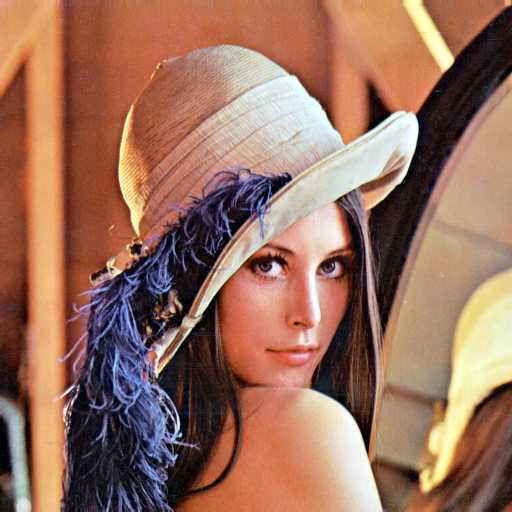

In [3]:
# @title Load Image

path = '/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/lena.jpg'
img = cv.imread(path)
cv2_imshow(img)

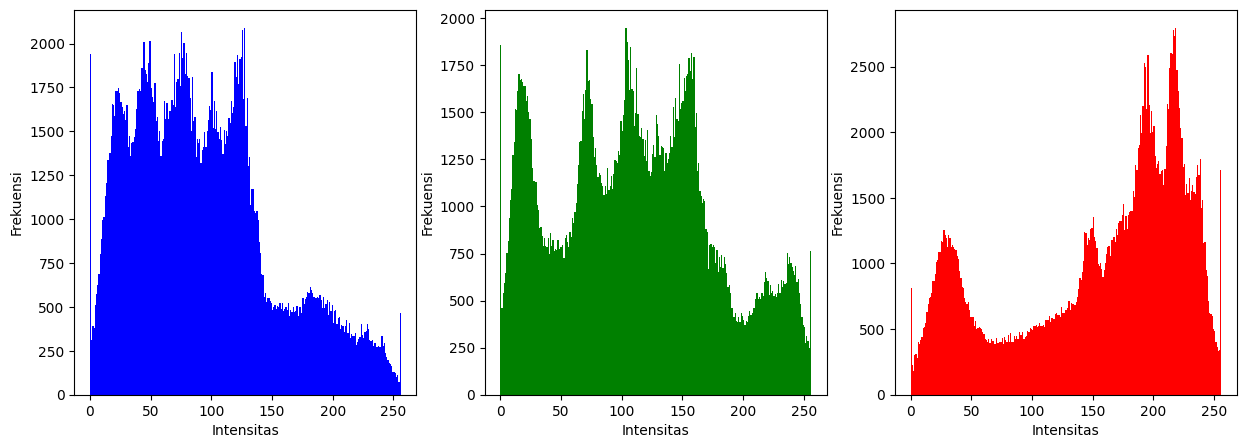

In [4]:
# @title Membuat Histogram Berdasarkan Channel Warna

# Melakukan ekstrak channel dari multidimensi menjadi 1d dengan menggunakan ravel
img_b = img[:,:,0].ravel()
img_g = img[:,:,1].ravel()
img_r = img[:,:,2].ravel()

# Membuat histogram untuk menampilkan warna masing masing channel
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(img_b, bins=256, range=(0, 256), color='b')
ax[0].set_xlabel('Intensitas')
ax[0].set_ylabel('Frekuensi')

ax[1].hist(img_g, bins=256, range=(0, 256), color='g')
ax[1].set_xlabel('Intensitas')
ax[1].set_ylabel('Frekuensi')

ax[2].hist(img_r, bins=256, range=(0, 256), color='r')
ax[2].set_xlabel('Intensitas')
ax[2].set_ylabel('Frekuensi')
plt.show()

In [5]:
# @title Membandingkan hasil output plotlib dan numpy

# Membuat histogram numpy
hist_b, bins = np.histogram(img_b, bins=256, range=(0, 256))
hist_g, bins = np.histogram(img_g, bins=256, range=(0, 256))
hist_r, bins = np.histogram(img_r, bins=256, range=(0, 256))

# Melakukan print untuk menampilkan array dari numpy histogram
print("Channel B")
print(hist_b)
print("Channel G")
print(hist_g)
print("Channel R")
print(hist_r)

Channel B
[1941  309  390  378  513  573  623  686  803  884  993 1010 1129 1205
 1337 1336 1378 1476 1658 1652 1586 1731 1731 1747 1721 1666 1639 1599
 1614 1562 1648 1408 1473 1361 1436 1438 1468 1513 1625 1731 1741 1728
 1861 1863 2009 1850 1829 1778 1891 2013 1749 1698 1666 1777 1558 1580
 1442 1503 1360 1446 1454 1675 1570 1659 1570 1613 1615 1681 1651 1939
 1637 1781 1799 1947 1757 2068 1920 2005 1828 1947 1816 1805 1692 1499
 1812 1560 1579 1352 1456 1435 1459 1318 1396 1412 1496 1408 1501 1562
 1646 1621 1837 1517 1670 1513 1615 1495 1456 1522 1453 1368 1508 1425
 1504 1476 1574 1547 1670 1607 1639 1892 1807 1932 1767 1914 1923 2077
 1684 2088 1531 1688 1305 1351 1083 1174 1171 1044 1034 1046  996  871
  805  685  682  554  582  526  550  551  534  520  481  498  512  487
  504  500  522  488  525  477  490  499  482  522  448  482  471  498
  471  476  506  448  500  498  466  550  515  543  557  585  578  612
  595  577  555  549  553  554  553  568  540  494  557  491  517  

# Perbedaan plt dan numpy
Pada PLT kita disajikan sebuah visual grafik histogram sedangkan pada numpy hanya berisi numpy array untuk histogramnya tidak disajikan berdasarkan visual

In [22]:
# @title Melakukan Histogram Equalization

# Melakukan import gambar
ori_img = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/lena_lc.jpg')
img_equalize = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/lena.jpg')

# Inisialisasi concat image
img_concat = cv.hconcat([ori_img, img_equalize])

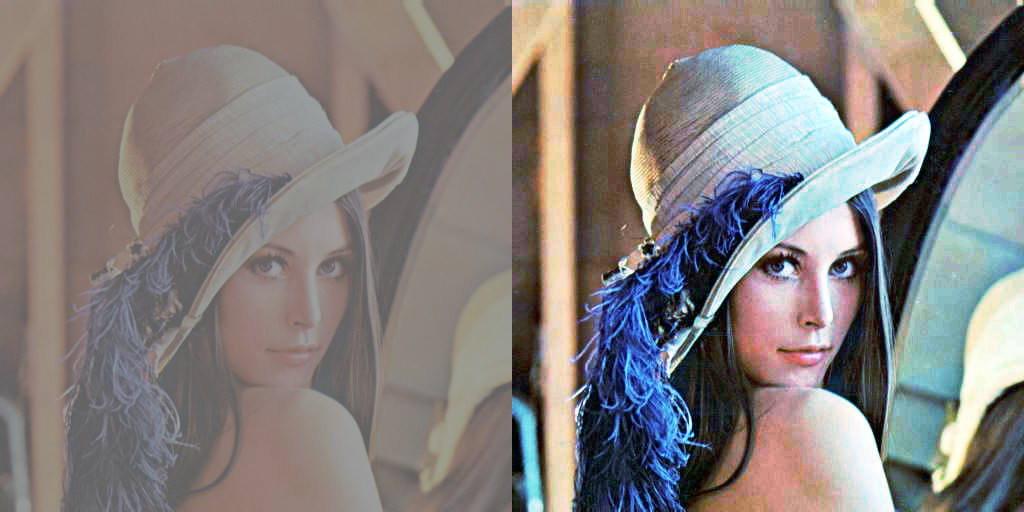

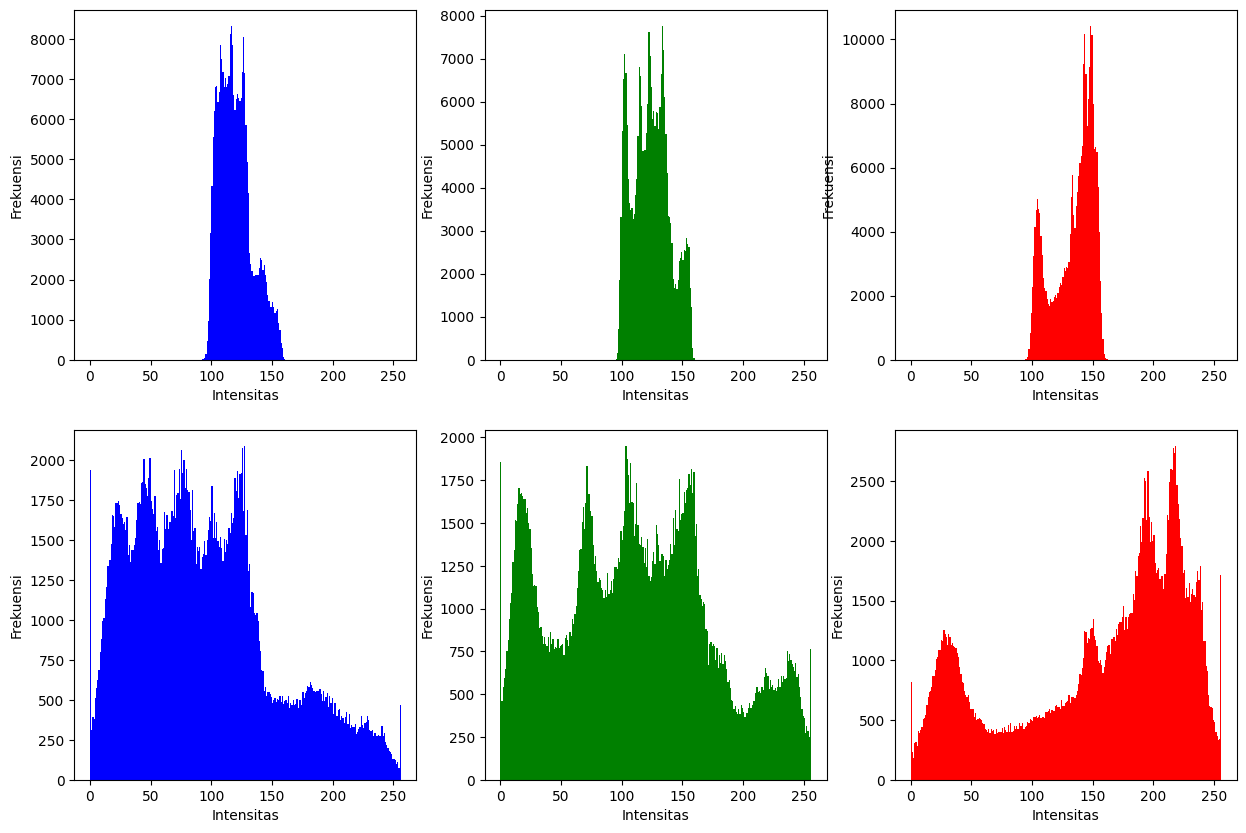

In [24]:
# Mengekstak masing masing channel rgb untuk masing masing gambar

ori_img_r = ori_img[:, :, 2].ravel()
ori_img_g = ori_img[:, :, 1].ravel()
ori_img_b = ori_img[:, :, 0].ravel()

img_equalize_r = img_equalize[:, :, 2].ravel()
img_equalize_g = img_equalize[:, :, 1].ravel()
img_equalize_b = img_equalize[:, :, 0].ravel()

# Menampilkan histogram dan concat img
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Histogram ori img
ax[0, 0].hist(ori_img_b, bins=256, range=(0, 256), color='b')
ax[0, 0].set_xlabel('Intensitas')
ax[0, 0].set_ylabel('Frekuensi')

ax[0, 1].hist(ori_img_g, bins=256, range=(0, 256), color='g')
ax[0, 1].set_xlabel('Intensitas')
ax[0, 1].set_ylabel('Frekuensi')

ax[0, 2].hist(ori_img_r, bins=256, range=(0, 256), color='r')
ax[0, 2].set_xlabel('Intensitas')
ax[0, 2].set_ylabel('Frekuensi')

# Histogram equalize img
ax[1, 0].hist(img_equalize_b, bins=256, range=(0, 256), color='b')
ax[1, 0].set_xlabel('Intensitas')
ax[1, 0].set_ylabel('Frekuensi')

ax[1, 1].hist(img_equalize_g, bins=256, range=(0, 256), color='g')
ax[1, 1].set_xlabel('Intensitas')
ax[1, 1].set_ylabel('Frekuensi')

ax[1, 2].hist(img_equalize_r, bins=256, range=(0, 256), color='r')
ax[1, 2].set_xlabel('Intensitas')
ax[1, 2].set_ylabel('Frekuensi')

# Menampilkan concat img dan histogram
cv2_imshow(img_concat)
plt.show()

In [33]:
# @title Function menampilkan histogram

def show_hist_equalize(ori_img, img_equalize):
  # Mengekstak masing masing channel rgb untuk masing masing gambar

  ori_img_r = ori_img[:, :, 2].ravel()
  ori_img_g = ori_img[:, :, 1].ravel()
  ori_img_b = ori_img[:, :, 0].ravel()

  img_equalize_r = img_equalize[:, :, 2].ravel()
  img_equalize_g = img_equalize[:, :, 1].ravel()
  img_equalize_b = img_equalize[:, :, 0].ravel()

  # Menampilkan histogram dan concat img
  fig, ax = plt.subplots(2, 3, figsize=(15, 10))

  # Histogram ori img
  ax[0, 0].hist(ori_img_b, bins=256, range=(0, 256), color='b')
  ax[0, 0].set_xlabel('Intensitas')
  ax[0, 0].set_ylabel('Frekuensi')

  ax[0, 1].hist(ori_img_g, bins=256, range=(0, 256), color='g')
  ax[0, 1].set_xlabel('Intensitas')
  ax[0, 1].set_ylabel('Frekuensi')

  ax[0, 2].hist(ori_img_r, bins=256, range=(0, 256), color='r')
  ax[0, 2].set_xlabel('Intensitas')
  ax[0, 2].set_ylabel('Frekuensi')

  # Histogram equalize img
  ax[1, 0].hist(img_equalize_b, bins=256, range=(0, 256), color='b')
  ax[1, 0].set_xlabel('Intensitas')
  ax[1, 0].set_ylabel('Frekuensi')

  ax[1, 1].hist(img_equalize_g, bins=256, range=(0, 256), color='g')
  ax[1, 1].set_xlabel('Intensitas')
  ax[1, 1].set_ylabel('Frekuensi')

  ax[1, 2].hist(img_equalize_r, bins=256, range=(0, 256), color='r')
  ax[1, 2].set_xlabel('Intensitas')
  ax[1, 2].set_ylabel('Frekuensi')

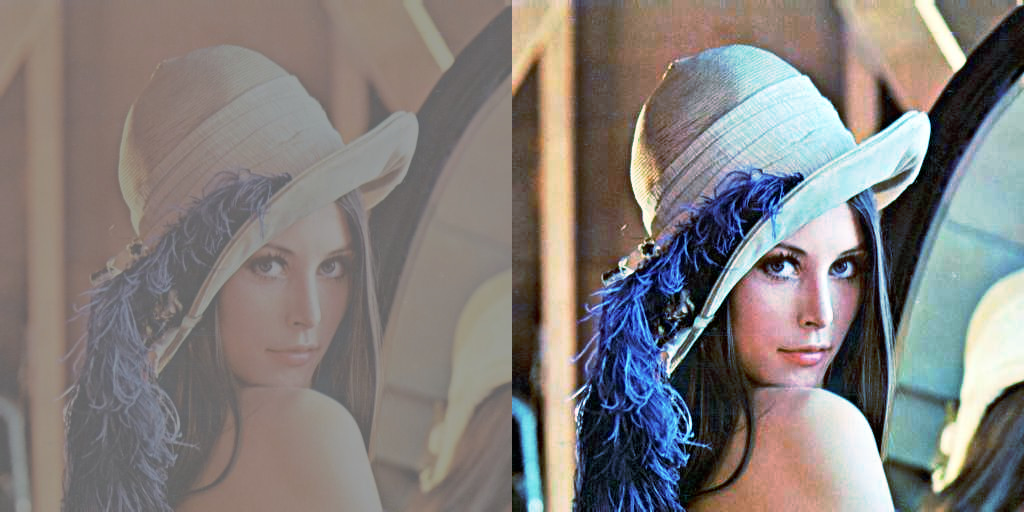

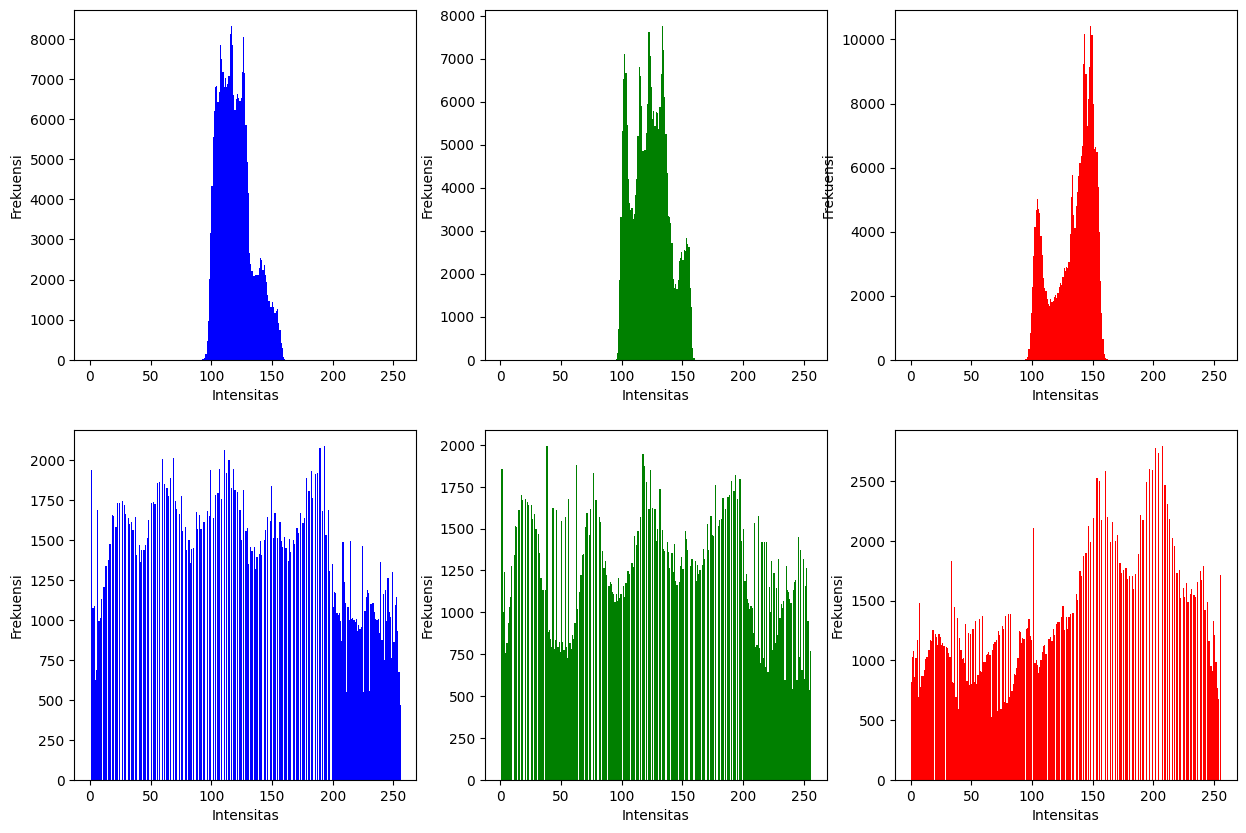

In [34]:
# @title 5. Melakukan equalization histogram

# Melakukan extract channel warna rgb
red_freq, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
green_freq, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
blue_freq, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

# Menghitung penjumlahan kumulatif dari frekuensi
red_cumulative = np.cumsum(red_freq)
green_cumulative = np.cumsum(green_freq)
blue_cumulative = np.cumsum(blue_freq)

# Normalisasi kumulatif frekuensi
num_pixels = img.shape[0] * img.shape[1]
red_cumulative_normalized = (red_cumulative / num_pixels) * 255
green_cumulative_normalized = (green_cumulative / num_pixels) * 255
blue_cumulative_normalized = (blue_cumulative / num_pixels) * 255

red_equalized = red_cumulative_normalized[img[:, :, 0]]
green_equalized = green_cumulative_normalized[img[:, :, 1]]
blue_equalized = blue_cumulative_normalized[img[:, :, 2]]

# Membuat citra hasil equalize
equalized_img = np.zeros_like(img)
equalized_img[:, :, 0] = red_equalized.astype(np.uint8)
equalized_img[:, :, 1] = green_equalized.astype(np.uint8)
equalized_img[:, :, 2] = blue_equalized.astype(np.uint8)

# Menampilkan hasil
concat_img = cv.hconcat([ori_img, equalized_img])
cv2_imshow(concat_img)
show_hist_equalize(ori_img, equalized_img)

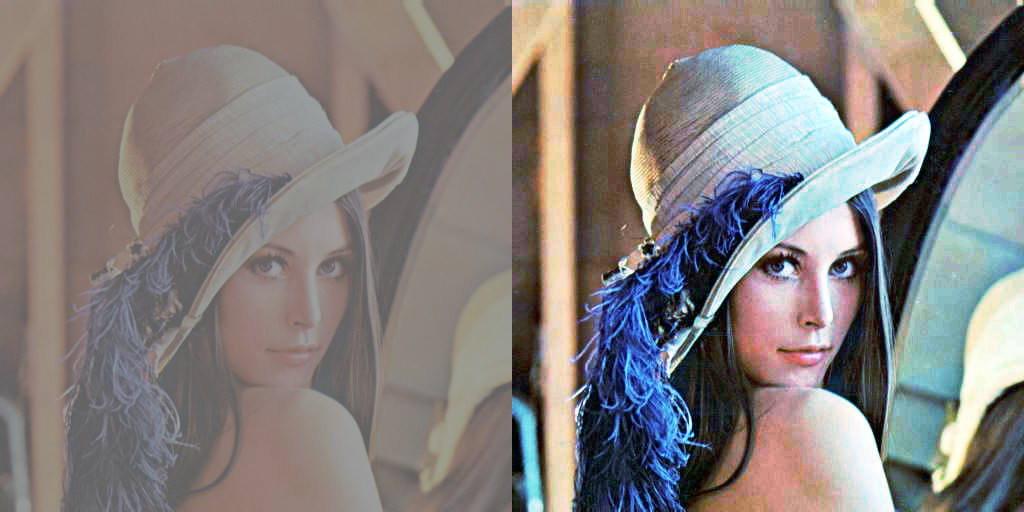

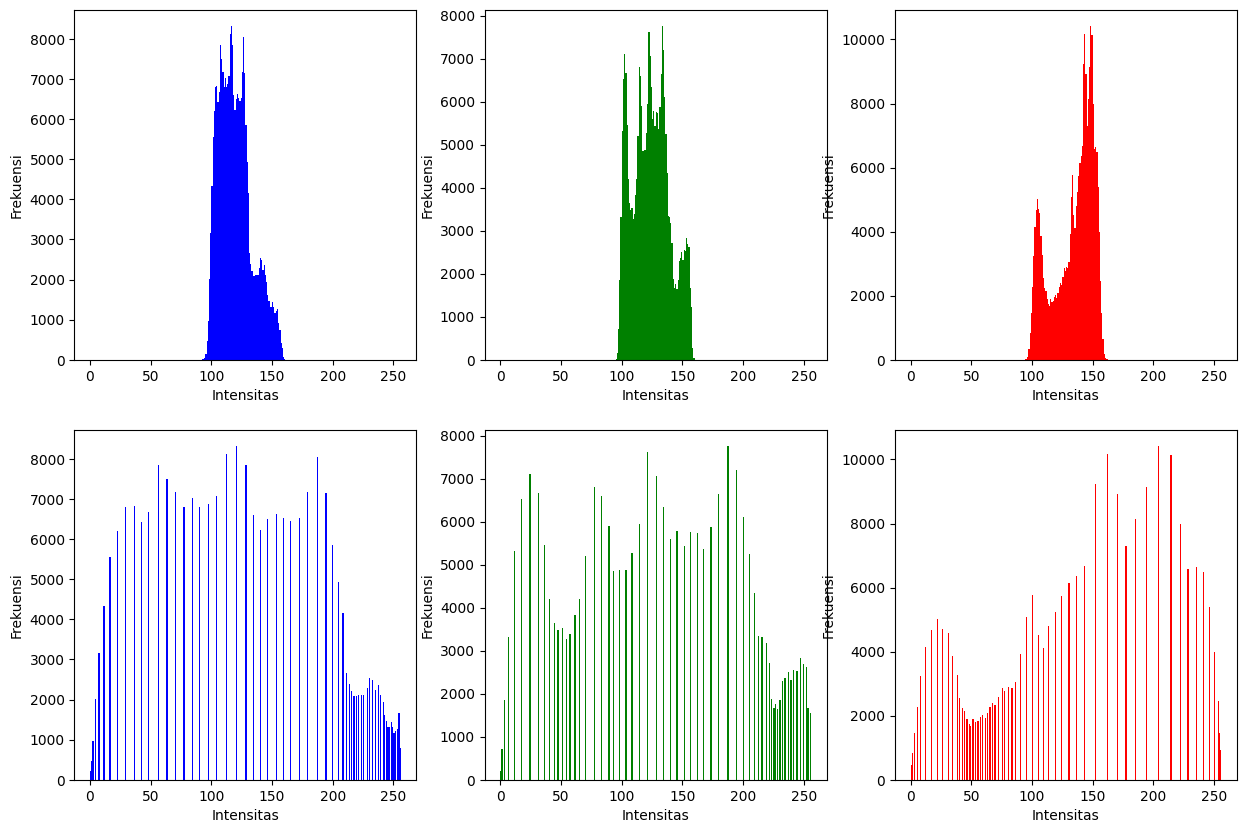

In [35]:
# @title 6. Perbandingan Menggunakan equalizeHist dari opencv

# Melakukan import gambar lena
ori_img = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/lena_lc.jpg')

# Melakukan pengambilan channel rgb
r = ori_img[:, :, 2]
g = ori_img[:, :, 1]
b = ori_img[:, :, 0]

# Melakukan equalize hist untuk masing masing channel
r_equalize = cv.equalizeHist(r)
g_equalize = cv.equalizeHist(g)
b_equalize = cv.equalizeHist(b)

merge_equalize = cv.merge((b_equalize, g_equalize, r_equalize))

# Melakukan concat image
img_concat = cv.hconcat([ori_img, merge_equalize])

# Menampilkan hasil
cv2_imshow(img_concat)
show_hist_equalize(ori_img, merge_equalize)

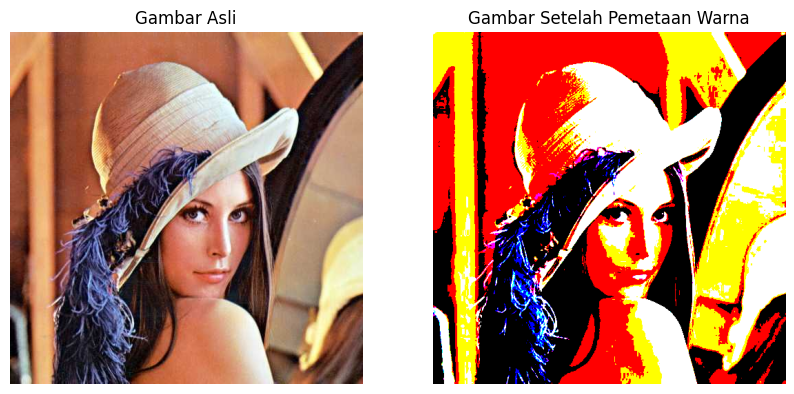

In [31]:
# @title 7. Melakukan pemetaan warna 18 juta RGB menjadi 8 warna

# Melakukan pengambilan image
img = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/lena.jpg')

# Warna target (Hitam, Hijau, Kuning, Biru, Cyan, Magenta, Putih)
colors = {
    'black': np.array([0, 0, 0]),
    'green': np.array([0, 255, 0]),
    'yellow': np.array([255, 255, 0]),
    'blue': np.array([0, 0, 255]),
    'cyan': np.array([0, 255, 255]),
    'red': np.array([255, 0, 0]),
    'magenta': np.array([255, 0, 255]),
    'white': np.array([255, 255, 255])
}

# Fungsi untuk memetakan setiap piksel ke warna terdekat
def map_color(pixel):
    min_dist = float('inf')
    closest_color = None

    for color_name, color_value in colors.items():
        # Hitung jarak Euclidean antara pixel dan warna target
        dist = np.linalg.norm(pixel - color_value)

        if dist < min_dist:
            min_dist = dist
            closest_color = color_value

    return closest_color

# Konversi gambar dari BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Dapatkan ukuran gambar
rows, cols, _ = img_rgb.shape

# Buat gambar baru untuk hasil akhir
mapped_img = np.zeros_like(img_rgb)

# Langkah 2: Iterasi setiap piksel dan ganti dengan warna terdekat
for i in range(rows):
    for j in range(cols):
        # Pemetaan warna piksel
        mapped_img[i, j] = map_color(img_rgb[i, j])

# Langkah 3: Tampilkan gambar sebelum dan sesudah pemetaan
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mapped_img)
plt.title('Gambar Setelah Pemetaan Warna')
plt.axis('off')

plt.show()

In [38]:
# Function untuk dithering floyd dan steinberg

def floyd_steinberg_dithering_color(image):
    img = image.astype(np.float32)  # Konversi gambar ke float untuk perhitungan
    height, width, _ = img.shape

    for y in range(height - 1):
        for x in range(width - 1):
            # Ambil nilai warna RGB pixel saat ini
            old_pixel_blue = img[y, x, 0]
            old_pixel_green = img[y, x, 1]
            old_pixel_red = img[y, x, 2]

            # Ambil nilai threshold dari warna RGB (0 atau 255)
            new_pixel_blue = threshold(old_pixel_blue)
            new_pixel_green = threshold(old_pixel_green)
            new_pixel_red = threshold(old_pixel_red)

            # Simpan pixel yang sudah ditreshold
            img[y, x, 0] = new_pixel_blue
            img[y, x, 1] = new_pixel_green
            img[y, x, 2] = new_pixel_red

            # Hitung error untuk masing-masing channel warna
            error_blue = old_pixel_blue - new_pixel_blue
            error_green = old_pixel_green - new_pixel_green
            error_red = old_pixel_red - new_pixel_red

            # Distribusi error ke pixel tetangga (sesuai dengan aturan Floyd-Steinberg)
            if x + 1 < width:
                img[y, x + 1, 0] += error_blue * 7 / 16
                img[y, x + 1, 1] += error_green * 7 / 16
                img[y, x + 1, 2] += error_red * 7 / 16
            if y + 1 < height:
                if x > 0:
                    img[y + 1, x - 1, 0] += error_blue * 3 / 16
                    img[y + 1, x - 1, 1] += error_green * 3 / 16
                    img[y + 1, x - 1, 2] += error_red * 3 / 16
                img[y + 1, x, 0] += error_blue * 5 / 16
                img[y + 1, x, 1] += error_green * 5 / 16
                img[y + 1, x, 2] += error_red * 5 / 16
                if x + 1 < width:
                    img[y + 1, x + 1, 0] += error_blue * 1 / 16
                    img[y + 1, x + 1, 1] += error_green * 1 / 16
                    img[y + 1, x + 1, 2] += error_red * 1 / 16

    return img.astype(np.uint8)

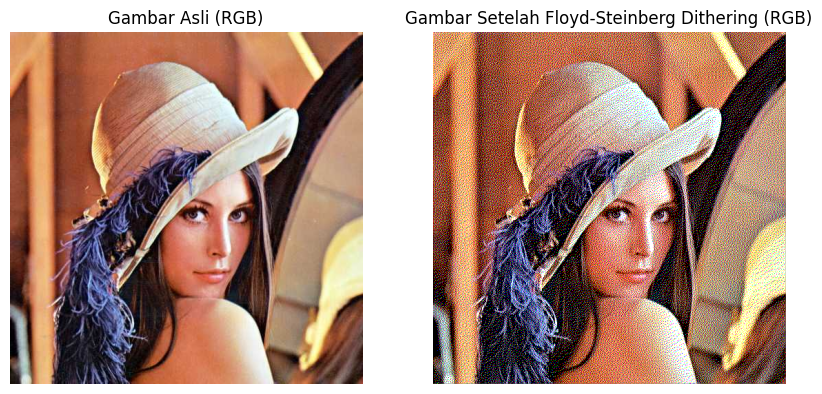

In [39]:
# @title 8. Melakukan dithering Floyd dan Steinberg

# Fungsi threshold untuk nilai warna
def threshold(val):
    return 255 if val >= 128 else 0

# Langkah 1: Membaca gambar berwarna (RGB)
img = cv2.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/lena.jpg')

# Konversi gambar dari BGR (OpenCV default) ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Langkah 2: Terapkan Floyd-Steinberg dithering pada gambar
dithered_img = floyd_steinberg_dithering_color(img_rgb)

# Langkah 3: Tampilkan gambar sebelum dan sesudah dithering
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dithered_img)
plt.title('Gambar Setelah Floyd-Steinberg Dithering (RGB)')
plt.axis('off')

plt.show()


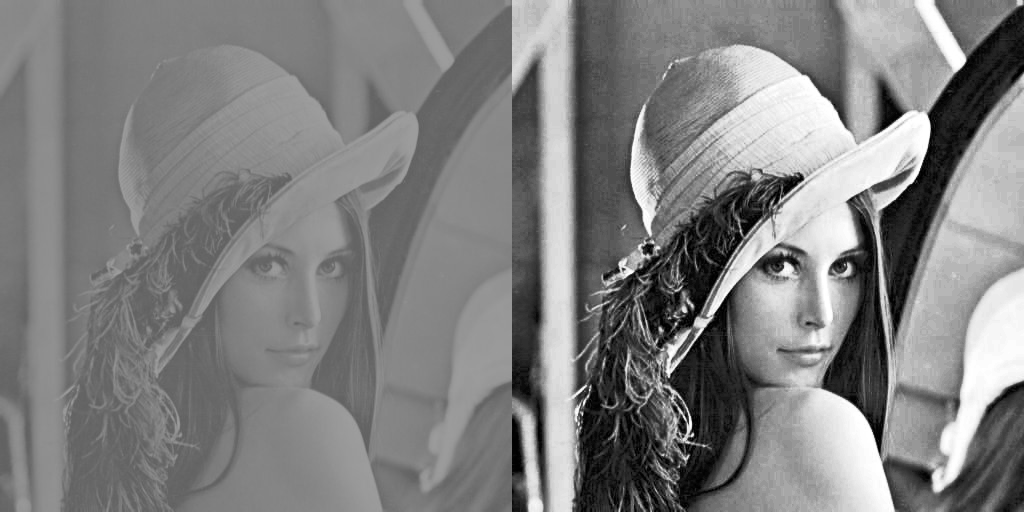

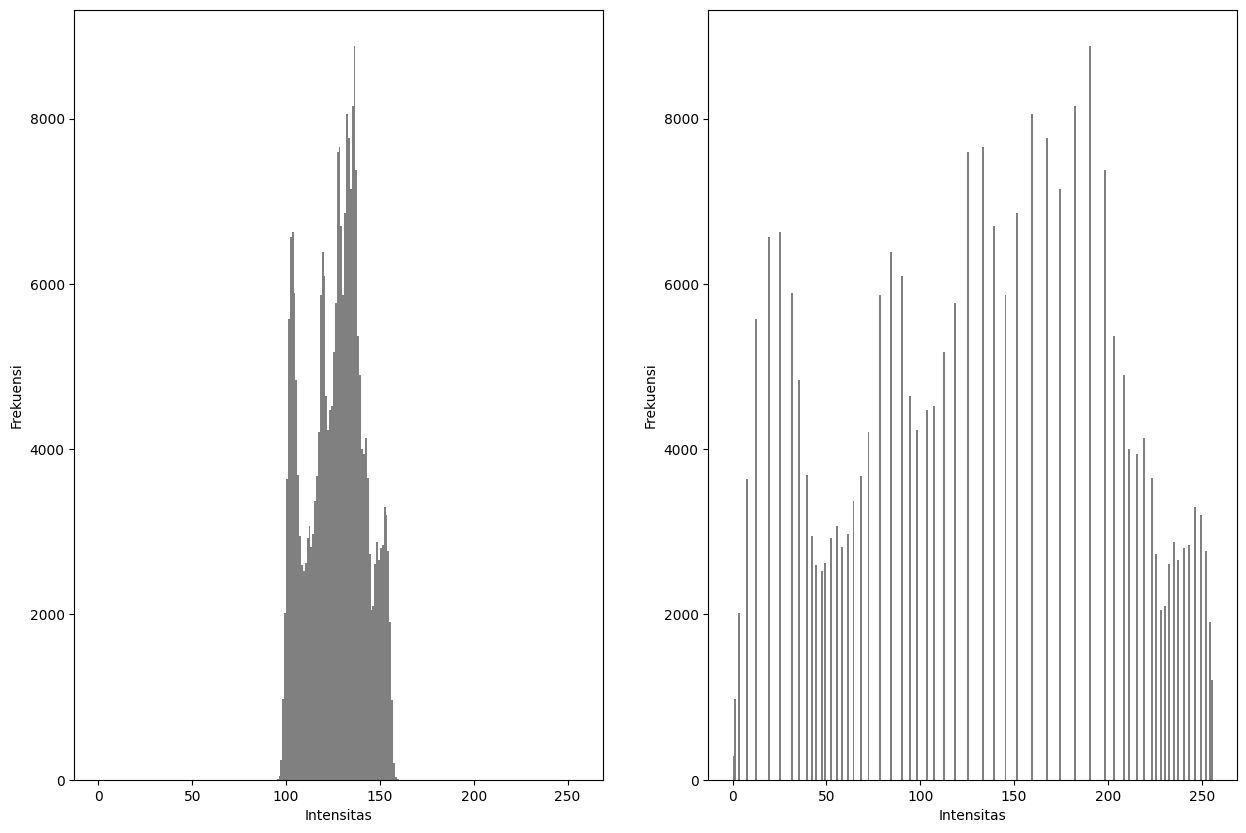

In [46]:
# @title 9. Melakukan histogram equalization dari gray image dan melakukan dithering pada image hasil equalization

# Melakukan import image lena_lc
ori_img = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/lena_lc.jpg', 0)

# Melakukan equalization terhadap image
equalize_img = cv.equalizeHist(ori_img)

# Menampilkan perbandingan sebelum equalize img dan sesudah
img_concat = cv.hconcat([ori_img, equalize_img])
cv2_imshow(img_concat)

# Menampilkan histogram sebelum dan sesudah
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].hist(ori_img.ravel(), bins=256, range=(0, 256), color='gray')
ax[0].set_xlabel('Intensitas')
ax[0].set_ylabel('Frekuensi')

ax[1].hist(equalize_img.ravel(), bins=256, range=(0, 256), color='gray')
ax[1].set_xlabel('Intensitas')
ax[1].set_ylabel('Frekuensi')

plt.show()

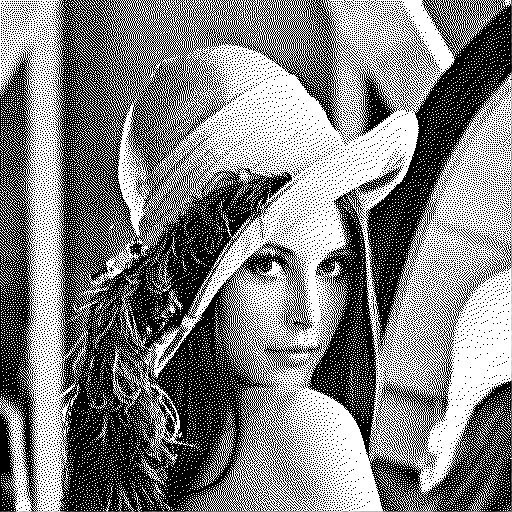

In [47]:
# Melakukan dithering hasil equalization img

img_rgb = cv.cvtColor(equalize_img, cv.COLOR_GRAY2RGB)
dithered_img = floyd_steinberg_dithering_color(img_rgb)

# Menampilkan hasil dithering
cv2_imshow(dithered_img)